# Government Supplier Prediction Project
Alana Rutherford, 
500953715, 
Supervisor Derya Kici, Ph.D, 
November 7, 2021


## Data Import

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import zipfile

with zipfile.ZipFile('data/tpsgc-pwgsc_co-ch_tous-all.zip', 'r') as zip_ref:
    zip_ref.extractall('data')
contractHistory = pd.read_csv('data/tpsgc-pwgsc_co-ch_tous-all.csv', usecols = range(0,42))

## General Data Description

In [257]:
contractHistory.columns

Index(['contract-number', 'amendment-number', 'award-date', 'expiry-date',
       'contract-value', 'gsin', 'gsin-description_en', 'gsin-description_fr',
       'competitive-tender_en', 'competitive-tender_fr',
       'limited-tender-reason', 'limited-tender-reason-description_en',
       'limited-tender-reason-description_fr', 'solicitation-procedure',
       'solicitation-procedure-description_en',
       'solicitation-procedure-description_fr', 'trade-agreement',
       'trade-agreement-description_en', 'trade-agreement-description_fr',
       'supplier-standardized-name', 'supplier-operating-name',
       'supplier-legal-name', 'supplier-address-city',
       'supplier-address-prov-state', 'supplier-address-postal-code',
       'supplier-address-country', 'organization-employee-count_en',
       'organization-employee-count_fr', 'total-contract-value',
       'number-records', 'end-user-entity_en', 'end-user-entity_fr',
       'contracting-entity-office-name_en',
       'contractin

In [258]:
contractHistory.head()

,contract-number,amendment-number,award-date,expiry-date,contract-value,gsin,gsin-description_en,gsin-description_fr,competitive-tender_en,competitive-tender_fr,...,contracting-entity-office-name_en,contracting-entity-office-name_fr,contracting-address-street-1,contracting-address-street-2,contracting-address-city,contracting-address-prov-state,contracting-address-postal-code,contracting-address-country,procurement-entity-name_en,procurement-entity-name_fr
0,F2599-090025/001/MD,000,2009-06-16,2009-10-20,30174.0,N1990,"Vessels, Miscellaneous",Bateaux divers,Yes,Oui,...,CCG CENTRAL&ARCTIC RGN,N/D,MARINE ENGINEERING,520 EXMOUTH ST,SARNIA,Ontario,N7T8B1,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...
1,F2599-090025/001/MD,001,2009-07-15,2009-10-20,4876.0,N1990,"Vessels, Miscellaneous",Bateaux divers,Yes,Oui,...,CCG CENTRAL&ARCTIC RGN,N/D,MARINE ENGINEERING,520 EXMOUTH ST,SARNIA,Ontario,N7T8B1,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...
2,F2599-090025/001/MD,002,2009-07-20,2009-10-20,26914.0,N1990,"Vessels, Miscellaneous",Bateaux divers,Yes,Oui,...,CCG CENTRAL&ARCTIC RGN,N/D,MARINE ENGINEERING,520 EXMOUTH ST,SARNIA,Ontario,N7T8B1,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...
3,E60LP-090002/392/LP,000,2010-01-01,2010-12-31,25000.0,V502B,"Hotels, Motels and Commercial Accommodation","Hôtels, motels et logements commerciaux",Yes,Oui,...,CONSOLIDATED PROC LP ICPSS,N/D,PORTAGE III 7B3,11 LAURIER ST,GATINEAU,Quebec,K1A0S5,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...
4,E60LP-110001/050/LP,000,2012-01-01,2012-12-31,25000.0,V502B,"Hotels, Motels and Commercial Accommodation","Hôtels, motels et logements commerciaux",Yes,Oui,...,CONSOLIDATED PROC LP ICPSS,N/D,PORTAGE III 7B3,11 LAURIER ST,GATINEAU,Quebec,K1A0S5,Canada,Public Works and Government Services Canada,Travaux publics et Services gouvernementaux Ca...


In [259]:
contractHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441210 entries, 0 to 441209
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   contract-number                        441210 non-null  object 
 1   amendment-number                       441210 non-null  object 
 2   award-date                             441210 non-null  object 
 3   expiry-date                            441210 non-null  object 
 4   contract-value                         441210 non-null  float64
 5   gsin                                   441199 non-null  object 
 6   gsin-description_en                    441199 non-null  object 
 7   gsin-description_fr                    441210 non-null  object 
 8   competitive-tender_en                  441210 non-null  object 
 9   competitive-tender_fr                  441210 non-null  object 
 10  limited-tender-reason                  94299 non-null   

## Attribute Data Description
Includes use of describe to obtain the count and unique, and use of value count to identify the top most frequent attributes. This was completed for all categorical attributes that were not considered duplicates on initial analysis. For the sake of brevity, only the describe function is provided below after the first attribute. 

In [260]:
contractHistory.describe()

,contract-value,limited-tender-reason,total-contract-value,number-records
count,4.412100e+05,94299.000000,4.412100e+05,441210.000000
mean,4.398310e+05,75.398689,8.457397e+06,8.202300
std,1.609191e+07,7.860150,1.061860e+08,18.275149
min,-1.540262e+08,8.000000,-1.985487e+08,1.000000
25%,0.000000e+00,71.000000,2.096325e+04,1.000000
50%,8.715000e+03,71.000000,1.268150e+05,3.000000
75%,6.941075e+04,85.000000,7.749660e+05,6.000000
max,5.221000e+09,90.000000,5.761974e+09,206.000000


In [261]:
contractHistory['contract-number'].describe()

count                   441210
unique                  199675
top       E0208-150548/001/PWZ
freq                       206
Name: contract-number, dtype: object

In [262]:
contractHistory['contract-number'].value_counts()

E0208-150548/001/PWZ    206
EN578-110558/001/XL     162
EP008-112560/001/GC     152
EP008-112560/004/GC     139
EW038-140681/001/PWU    139
                       ... 
W0113-10A128/001/BOR      1
5K003-156233/001/WPG      1
5K003-148856/001/WPG      1
W8482-128975/001/GRK      1
U4030-221421/001/HN       1
Name: contract-number, Length: 199675, dtype: int64

In [263]:
contractHistory['amendment-number'].describe()

count     441210
unique       237
top          000
freq      174270
Name: amendment-number, dtype: object

In [264]:
contractHistory['award-date'].describe()

count         441210
unique          4085
top       2011-01-01
freq            2277
Name: award-date, dtype: object

In [265]:
contractHistory['expiry-date'].describe()

count         441210
unique          6859
top       2011-03-31
freq            9500
Name: expiry-date, dtype: object

In [266]:
contractHistory['gsin'].describe()

count     441199
unique      5203
top        N7030
freq       26529
Name: gsin, dtype: object

In [267]:
contractHistory['gsin-description_en'].describe()

count           441199
unique            5188
top       ADP Software
freq             26529
Name: gsin-description_en, dtype: object

In [268]:
contractHistory['competitive-tender_en'].describe()

count     441210
unique         2
top          Yes
freq      346895
Name: competitive-tender_en, dtype: object

In [269]:
contractHistory['limited-tender-reason-description_en'].describe()

count                94299
unique                  16
top       Exclusive Rights
freq                 57400
Name: limited-tender-reason-description_en, dtype: object

In [270]:
contractHistory['solicitation-procedure-description_en'].describe()

count           441210
unique               4
top       Open Bidding
freq            269648
Name: solicitation-procedure-description_en, dtype: object

In [271]:
contractHistory['trade-agreement'].describe()

count     440929
unique        35
top            I
freq      115604
Name: trade-agreement, dtype: object

In [272]:
contractHistory['supplier-standardized-name'].describe()

count                                    441210
unique                                    36355
top       SIMEX DEFENCE INC / DEFENSE SIMEX INC
freq                                       4305
Name: supplier-standardized-name, dtype: object

In [273]:
contractHistory['supplier-address-city'].describe()

count     441091
unique      7261
top       Ottawa
freq       80001
Name: supplier-address-city, dtype: object

In [274]:
contractHistory['supplier-address-prov-state'].describe()

count      430737
unique         64
top       Ontario
freq       190079
Name: supplier-address-prov-state, dtype: object

In [275]:
contractHistory['supplier-address-country'].describe()

count     441210
unique       115
top       Canada
freq      398099
Name: supplier-address-country, dtype: object

In [276]:
contractHistory['supplier-address-postal-code'].describe()

count     438200
unique     27226
top       H9R1A6
freq        4305
Name: supplier-address-postal-code, dtype: object

In [277]:
contractHistory['organization-employee-count_en'].describe()

count                 441208
unique                    14
top       20 to 49 employees
freq                   71520
Name: organization-employee-count_en, dtype: object

In [278]:
contractHistory['end-user-entity_en'].describe()

count                                          441210
unique                                            132
top       Public Works and Government Services Canada
freq                                           182963
Name: end-user-entity_en, dtype: object

In [279]:
contractHistory['contracting-entity-office-name_en'].describe()

count     431285
unique      3422
top         NDHQ
freq       19931
Name: contracting-entity-office-name_en, dtype: object

In [280]:
contractHistory['contracting-address-street-1'].describe()

count                 441182
unique                  3140
top       101 COLONEL BY DR.
freq                   25490
Name: contracting-address-street-1, dtype: object

In [281]:
contractHistory['contracting-address-street-2'].describe()

count            308117
unique             1561
top       11 LAURIER ST
freq              82908
Name: contracting-address-street-2, dtype: object

In [282]:
contractHistory['contracting-address-city'].describe()

count     441182
unique       440
top       OTTAWA
freq      130007
Name: contracting-address-city, dtype: object

In [283]:
contractHistory['contracting-address-prov-state'].describe()

count      440905
unique         13
top       Ontario
freq       166823
Name: contracting-address-prov-state, dtype: object

In [284]:
contractHistory['contracting-address-postal-code'].describe()

count     441180
unique      1196
top       K1A0S5
freq      100214
Name: contracting-address-postal-code, dtype: object

In [285]:
contractHistory['contracting-address-country' ].describe()

count     441182
unique         4
top       Canada
freq      440905
Name: contracting-address-country, dtype: object

In [286]:
contractHistory['procurement-entity-name_en'].describe()

count                                          441210
unique                                              1
top       Public Works and Government Services Canada
freq                                           441210
Name: procurement-entity-name_en, dtype: object

##  Visualizing Categorical Attributes
A selection of the categorical attributes have been visualized below for the sake of brevity. The full set were initially reviewed. 

<AxesSubplot:>

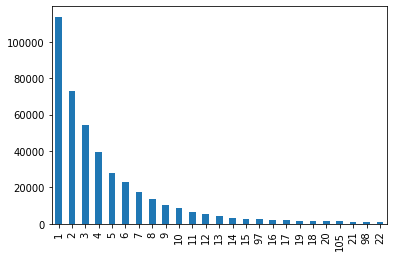

In [287]:
#contractHistory['amendment-number'].value_counts().plot(kind = 'bar')
recordNo = contractHistory['number-records'].value_counts()
recordNo = recordNo[recordNo > 1000]
recordNo.plot(kind = 'bar')

<AxesSubplot:>

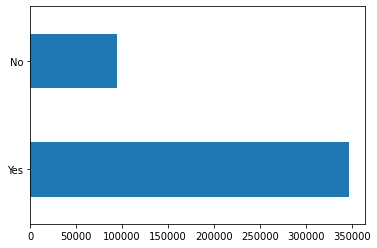

In [288]:
contractHistory['competitive-tender_en'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

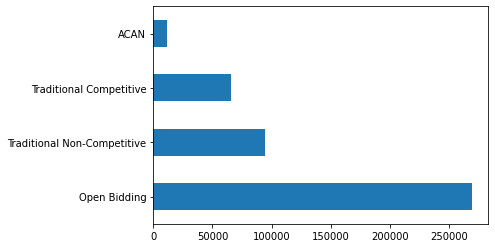

In [289]:
contractHistory['solicitation-procedure-description_en'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

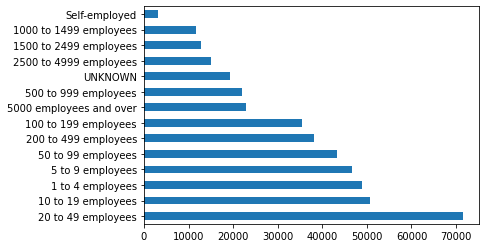

In [290]:
contractHistory['organization-employee-count_en'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

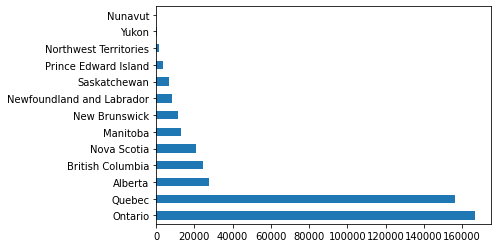

In [291]:
contractHistory['contracting-address-prov-state'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

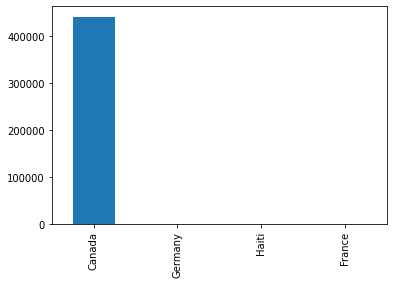

In [292]:
contractHistory['contracting-address-country'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

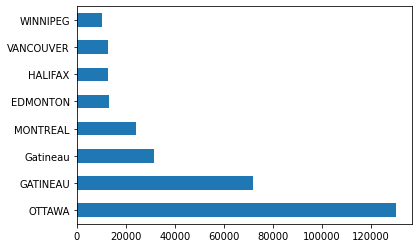

In [293]:
locate = contractHistory['contracting-address-city'].value_counts()
locate = locate[locate > 10000]
locate.plot(kind = 'barh')

<AxesSubplot:>

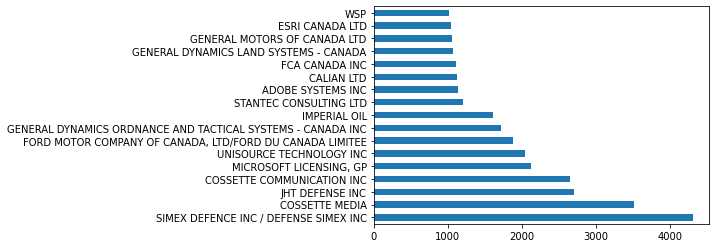

In [294]:
recordNo = contractHistory['supplier-standardized-name'].value_counts()
recordNo = recordNo[recordNo > 1000]
recordNo.plot(kind = 'barh')


## Visualizing Numerical Attributes

In [295]:
contractValue = contractHistory['contract-value'].value_counts().rename_axis('unique_values').reset_index(name='counts')
contractValue = pd.DataFrame(contractValue)
contractValue = contractValue.sort_values(by='unique_values')
print(contractValue)

        unique_values  counts
117559  -1.540262e+08       1
127586  -1.096930e+08       1
116720  -1.088050e+08       1
117581  -9.952789e+07       1
129207  -9.318418e+07       1
...               ...     ...
52144    2.610431e+09       1
48518    2.747983e+09       1
66517    2.953723e+09       1
94544    4.572961e+09       1
108677   5.221000e+09       1

[130637 rows x 2 columns]


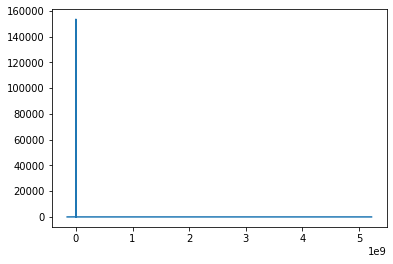

In [296]:
plt.plot(contractValue['unique_values'],contractValue['counts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c290a4d310>,
 'caps': [<matplotlib.lines.Line2D at 0x1c290a4da30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c290a75f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1c290a8d130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c290a8d4c0>],
 'means': []}

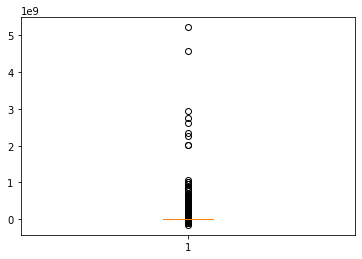

In [297]:
plt.boxplot(contractValue['unique_values'])

In [298]:
totalValue = contractHistory['total-contract-value'].value_counts().rename_axis('unique_values').reset_index(name='counts')
totalValue = pd.DataFrame(totalValue)
totalValue = totalValue.sort_values(by='unique_values')
print(totalValue)

       unique_values  counts
52233  -1.985487e+08       2
28062  -7.832411e+07       4
4957   -1.858009e+07       9
17839  -1.225113e+07       5
50605  -1.127514e+07       2
...              ...     ...
24138   2.900107e+09       4
73852   2.953723e+09       1
17389   5.007369e+09       5
448     5.723000e+09      51
4492    5.761974e+09      10

[98290 rows x 2 columns]


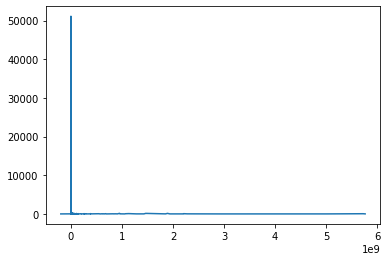

In [299]:
plt.plot(totalValue['unique_values'],totalValue['counts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c290b3c5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c290b3ccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c290b3c220>],
 'medians': [<matplotlib.lines.Line2D at 0x1c290b46430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c290b467c0>],
 'means': []}

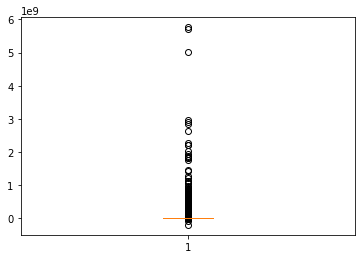

In [300]:
plt.boxplot(totalValue['unique_values'])

In [301]:
noRecord = contractHistory['number-records'].value_counts().rename_axis('unique_values').reset_index(name='counts')
noRecord = pd.DataFrame(noRecord)
noRecord = noRecord.sort_values(by='unique_values')
print(noRecord)

     unique_values  counts
0                1  113737
1                2   73210
2                3   54274
3                4   39550
4                5   27916
..             ...     ...
115            149       3
124            151       2
125            152       1
66             162     162
60             206     206

[130 rows x 2 columns]


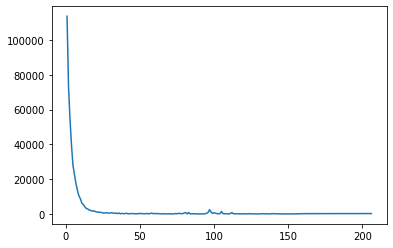

In [302]:
plt.plot(noRecord['unique_values'],noRecord['counts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c290bf84c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c290bf8ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c290bf8130>],
 'medians': [<matplotlib.lines.Line2D at 0x1c290c03220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c290c035b0>],
 'means': []}

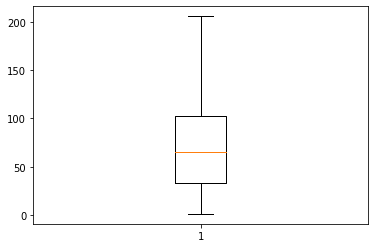

In [303]:
plt.boxplot(noRecord['unique_values'])

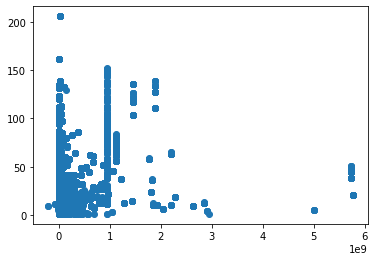

In [304]:
plt.scatter(contractHistory['total-contract-value'],contractHistory['number-records'])

## Correlation Analysis

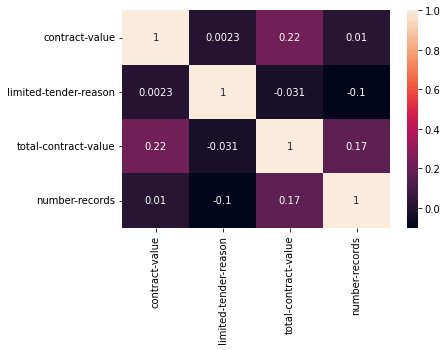

In [305]:
corrMatrix = contractHistory.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Removing Attributes
Duplicate attributes were removed, barring GSIN and trade agreements, since this information might help with later analysis.
Procurement entity information was removed since it showed one value.

In [306]:
editCH = contractHistory.drop(['gsin-description_fr','competitive-tender_fr','limited-tender-reason','limited-tender-reason-description_fr','solicitation-procedure','solicitation-procedure-description_fr','trade-agreement-description_en','trade-agreement-description_fr','supplier-operating-name','supplier-legal-name','organization-employee-count_fr','end-user-entity_fr','contracting-entity-office-name_fr','procurement-entity-name_en',
       'procurement-entity-name_fr'], axis = 1)

## Testing for Impact of Duplicate Contract Number Instances
Reviewing to determine whether duplicate contact numbers result in duplicate information elsewhere.

In [307]:
editCH.insert(27, 'contract-number supplier test',editCH['contract-number'] + editCH['supplier-standardized-name'])

In [308]:
editCH['contract-number supplier test'].value_counts()

E0208-150548/001/PWZWRIGHT CONSTRUCTION                                                                                   206
EN578-110558/001/XLWOLTERS KLUWER LTD / WOLTERS KLUWER LIMITEE                                                            162
EP008-112560/001/GCBROOKFIELD GLOBAL INTEGRATED SOLUTIONS CANADA LP/BROOKFIELD SOLUTIONS GLOBALES INTEGREES CANADA SEC    152
EW038-140681/001/PWUTRI CITY CANADA INC                                                                                   139
EP008-112560/004/GCBROOKFIELD GLOBAL INTEGRATED SOLUTIONS CANADA LP/BROOKFIELD SOLUTIONS GLOBALES INTEGREES CANADA SEC    139
                                                                                                                         ... 
W8160-140026/001/PICEDROM-SNI INC                                                                                           1
08324-140303/001/EJONX ENTERPRISE SOLUTIONS LTD                                                                       

In [309]:
editCH['contract-number'].describe()

count                   441210
unique                  199675
top       E0208-150548/001/PWZ
freq                       206
Name: contract-number, dtype: object

In [310]:
editCH['contract-number supplier test'].describe()

count                                      441210
unique                                     200644
top       E0208-150548/001/PWZWRIGHT CONSTRUCTION
freq                                          206
Name: contract-number supplier test, dtype: object

## Removing Duplicate Contract Number Instances
Since the test above indicates that there are only 969 unique instances where the supplier changes within the same contract number, representing only 0.485% of the contract numbers. The duplicate instances of contract numbers to reflect amendments were removed, as well as the contract value and amendment number, which are better reflected by the total contrat value and number of records attributes. The remaining instances reflect the first award dates of the contract numbers to capture the initial win of the contract. 

In [311]:
editCH.sort_values(['contract-number','award-date'], ascending=True, inplace=True)
editCH.insert(28, 'duplicate contract check', editCH.duplicated(subset='contract-number'))
editCH = editCH[editCH['duplicate contract check'] != True]
editCH.shape

(199675, 29)

In [312]:
editCH = editCH.drop(['amendment-number', 'contract-value', 'duplicate contract check', 'contract-number supplier test'], axis = 1)
editCH.shape

(199675, 25)

## Creating a Parent GSIN Category
Given the high volume of unique GSIN codes, and the ability to categorize the code within a parent company by the first letter, a GSIN category attribute has been created.

<AxesSubplot:>

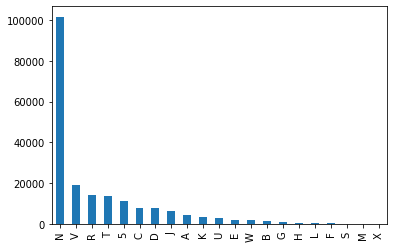

In [313]:
editCH.insert(5, 'gsin-category', editCH['gsin'].str[:1])
editCH['gsin-category'].value_counts().plot(kind = 'bar')

## Removing Limited Tender Reason

The information in the editCH dataset is generally filled in. However, a category with a significant amount (72.5%) missing values is the the limited tender reason column, which is a near exact match to the number of non-competitive tenders. Given the sparce data in this column, it has been removed from the dataset.

In [314]:
editCH['contract-number'].describe()

count                   199675
unique                  199675
top       01005-010324/009/WPG
freq                         1
Name: contract-number, dtype: object

In [315]:
editCH['limited-tender-reason-description_en'].describe()

count                54900
unique                  16
top       Exclusive Rights
freq                 30599
Name: limited-tender-reason-description_en, dtype: object

In [316]:
(199675-54900)/199675*100

72.50532114686365

In [317]:
editCH['competitive-tender_en'].value_counts()

Yes    144768
No      54907
Name: competitive-tender_en, dtype: int64

In [318]:
editCH = editCH.drop(['limited-tender-reason-description_en'], axis = 1)

## Managing Missing Categorical Values

The the following items have lower volumes of missing data: trade agreement (0.47%), supplier details such as city (0.23%), province/state (3.15%), postal code (0.96%), organization employee count (0.0005%), and contracting entity office name (2.66%) and details such as address street 1 (0.0015%), address street 2 (26.98%), province/state (0.075%), postal code (0.002%), and country (0.0015%). Since the freqnency of missing information is limited in all attributes except for address street 2, the rows containing missing data were removed. The attribute for address street 2 was due to high missing volume. However, province/state missing items were not removed since the missing cells reflect suppliers from other countries.


In [319]:
#this cell was repeated for all attributes with missing values to assess impact
editCH['gsin-description_en'].describe()

count                                          199675
unique                                           5164
top       Hotels, Motels and Commercial Accommodation
freq                                            16657
Name: gsin-description_en, dtype: object

In [320]:
editCH['contract-number'].describe()

count                   199675
unique                  199675
top       01005-010324/009/WPG
freq                         1
Name: contract-number, dtype: object

In [321]:
#this cell was repeated for all attributes with missing values to assess impact
(199675-199672)/199675*100

0.0015024414673844998

In [322]:
editCH = editCH.drop(['contracting-address-street-2'], axis = 1)

In [323]:
#editCH.dropna(subset = ['gsin-description_en', 'end-user-entity-top', 'trade-agreement', 'supplier-address-city', 'supplier-address-postal-code', 'organization-employee-count_en', 'contracting-entity-office-name_en', 'contracting-address-street-1', 'contracting-address-prov-state', 'contracting-address-postal-code', 'contracting-address-country'], axis = 0, inplace = True)

In [324]:
editCH.columns

Index(['contract-number', 'award-date', 'expiry-date', 'gsin',
       'gsin-description_en', 'gsin-category', 'competitive-tender_en',
       'solicitation-procedure-description_en', 'trade-agreement',
       'supplier-standardized-name', 'supplier-address-city',
       'supplier-address-prov-state', 'supplier-address-postal-code',
       'supplier-address-country', 'organization-employee-count_en',
       'total-contract-value', 'number-records', 'end-user-entity_en',
       'contracting-entity-office-name_en', 'contracting-address-street-1',
       'contracting-address-city', 'contracting-address-prov-state',
       'contracting-address-postal-code', 'contracting-address-country'],
      dtype='object')

In [325]:
editCH.dropna(subset = ['contract-number', 'award-date', 'expiry-date', 'gsin', 'gsin-description_en', 'gsin-category', 'competitive-tender_en', 'solicitation-procedure-description_en', 'trade-agreement', 'total-contract-value', 'end-user-entity_en', 'contracting-entity-office-name_en', 'contracting-address-city', 'contracting-address-prov-state', 'contracting-address-postal-code', 'contracting-address-country'], axis = 0, inplace = True)

In [326]:
editCH.shape

(194135, 24)

## Creating Time Series for Award Date Attribute
The expiry date was removed after review of the data.

In [327]:
editCH['award year']=[d.split('-')[0] for d in editCH['award-date']]
editCH['award month']=[d.split('-')[1] for d in editCH['award-date']]
editCH['award day']=[d.split('-')[2] for d in editCH['award-date']]

In [328]:
editCH['award year'] = pd.to_numeric(editCH['award year'])

In [329]:
awardYear = (editCH['award year'] - editCH['award year'].min()) / (editCH['award year'].max()-editCH['award year'].min())
editCH.insert(25, 'award-year-normalized',awardYear)

In [330]:
editCH.insert(24, 'days-since-first-award', 'None')

In [331]:
from datetime import datetime

editCH['award-date'] = editCH['award-date'].apply(pd.to_datetime)
editCH['days-since-first-award'] = (editCH['award-date'] - editCH['award-date'].min()).dt.days
editCH['days-since-first-award']

22402       89
22486      127
22488      259
279171      63
204467     243
          ... 
47968     1121
91429     1145
74499     1134
285173    1175
167242     152
Name: days-since-first-award, Length: 194135, dtype: int64

In [332]:
normalizedAwardDays = (editCH['days-since-first-award'] - editCH['days-since-first-award'].min()) / (editCH['days-since-first-award'].max()-editCH['days-since-first-award'].min())
editCH.insert(25, 'days-since-first-award-normalized',normalizedAwardDays)

## Numeric Attributes
### Total Contract Value
This data has a right skew, with negative values, a significant spike in values at 0 and 25000, and a long right tail with outliers.

In [333]:
editCH['total-contract-value'].value_counts()

0.0          18461
25000.0      10848
1.0            982
100000.0       758
26250.0        697
             ...  
3170196.0        1
615523.0         1
4769883.0        1
176914.0         1
3999.0           1
Name: total-contract-value, Length: 96040, dtype: int64

In [334]:
totalContractValue = editCH['total-contract-value'].value_counts().rename_axis('unique_values').reset_index(name='counts')
totalContractValue = pd.DataFrame(totalContractValue)
totalContractValue = totalContractValue.sort_values(by = 'unique_values')
print(totalContractValue)

       unique_values  counts
46269  -1.985487e+08       1
46747  -7.832411e+07       1
46157  -1.858009e+07       1
54057  -1.225113e+07       1
46247  -1.127514e+07       1
...              ...     ...
92349   2.858077e+09       1
44287   2.900107e+09       1
93468   2.953723e+09       1
91786   5.723000e+09       1
45844   5.761974e+09       1

[96040 rows x 2 columns]


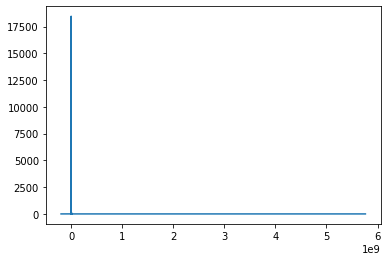

In [335]:
plt.plot(totalContractValue['unique_values'],totalContractValue['counts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2919b6790>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2919b6eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2919b6400>],
 'medians': [<matplotlib.lines.Line2D at 0x1c29d33f610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c29d33f9a0>],
 'means': []}

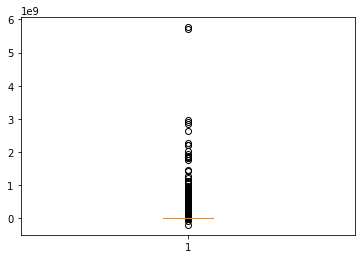

In [336]:
plt.boxplot(totalContractValue['unique_values'])

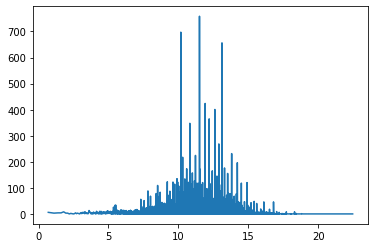

In [337]:
test = totalContractValue[['unique_values', 'counts']]
test = test[test['unique_values'] > 1]
test = test[test['unique_values'] != 25000]
plt.plot(np.log(test['unique_values']),test['counts'])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  2.,  0.,  1.,  3., 34.]),
 array([-1.85800910e+07, -1.83942901e+07, -1.82084892e+07, -1.80226883e+07,
        -1.78368874e+07, -1.76510865e+07, -1.74652856e+07, -1.72794847e+07,
        -1.70936838e+07, -1.69078829e+07, -1.67220820e+07, -1.65362811e+07,
        -1.63504802e+07, -1.61646793e+07, -1.59788784e+07, -1.57930775e+07,
        -1.56072766e+07, -1.54214757e+07, -1.52356748e+07, -1.50498739e+07,
        -1.48640730e+07, -1.46782721e+07, -1.44924712e

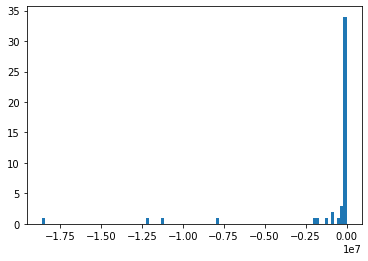

In [338]:
test2 = totalContractValue[['unique_values', 'counts']]
test2 = test2[test2['unique_values'] < 0]
test2 = test2[test2['unique_values'] > -25000000]
plt.hist(test2['unique_values'], bins = 100)

In [339]:
#This data has a lognormal distribution for the positive values when 0, 1, and 25000 are removed

In [340]:
#removing two significant outliers
remove = editCH[editCH['total-contract-value'] >= 4000000000].index
editCH.drop(remove, inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2915b17c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2915b1ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2915b1430>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2915b0640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2915b09d0>],
 'means': []}

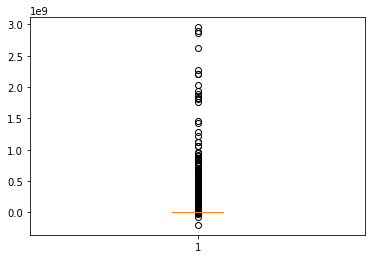

In [341]:
plt.boxplot(editCH['total-contract-value'])

In [342]:
normalizedContractValue = (editCH['total-contract-value'] - editCH['total-contract-value'].min()) / (editCH['total-contract-value'].max()-editCH['total-contract-value'].min())
editCH.insert(16, 'total-contract-value-normalized',normalizedContractValue)

In [343]:
contractValueNorm = editCH['total-contract-value-normalized'].value_counts().rename_axis('unique_values').reset_index(name='counts')
contractValueNorm = pd.DataFrame(contractValueNorm)
contractValueNorm = contractValueNorm.sort_values(by='unique_values')
print(contractValueNorm)

       unique_values  counts
46268       0.000000       1
46746       0.038139       1
46156       0.057092       1
54049       0.059099       1
46246       0.059409       1
...              ...     ...
56932       0.785771       1
44460       0.896624       1
92348       0.969658       1
44286       0.982991       1
93428       1.000000       1

[96038 rows x 2 columns]


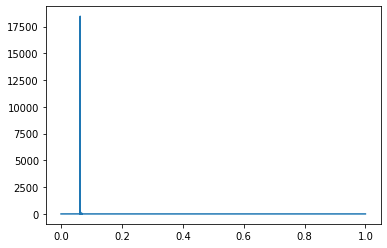

In [344]:
plt.plot(contractValueNorm['unique_values'],contractValueNorm['counts'])

### Number of Records

In [345]:
editCH['number-records'].value_counts()

1      110041
2       37463
3       17048
4        9743
5        5698
        ...  
103         1
67          1
135         1
123         1
64          1
Name: number-records, Length: 105, dtype: int64

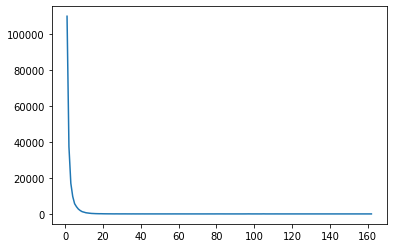

In [346]:
noRecord = editCH['number-records'].value_counts().rename_axis('records').reset_index(name='counts')
noRecord = pd.DataFrame(noRecord)
noRecord = noRecord.sort_values(by='records')
plt.plot(noRecord['records'],noRecord['counts'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c284d231f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c284d23850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c284d1de20>],
 'medians': [<matplotlib.lines.Line2D at 0x1c284d23f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c284d26340>],
 'means': []}

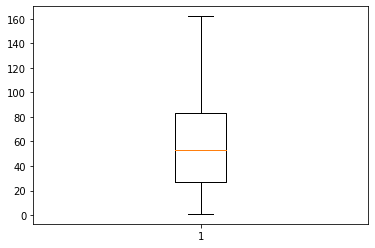

In [347]:
plt.boxplot(noRecord['records'])

In [348]:
#This data has an exponential distibution
#Since number of records does not have material impact on the outcome of the supplier award, it is being removed from this analysis
#noRecordNorm = (editCH['number-records'] - editCH['number-records'].min()) / (editCH['number-records'].max()-editCH['number-records'].min())
#editCH.insert(17, 'number-records-normalized',noRecordNorm)


In [349]:
editCH = editCH.drop(['number-records'], axis = 1)

In [350]:
#editCH = editCH.drop(['award year', 'award month', 'award day', 'expiry year', 'expiry month', 'expiry day'], axis = 1)

In [351]:
editCH.describe()

,total-contract-value,total-contract-value-normalized,days-since-first-award,days-since-first-award-normalized,award year,award-year-normalized
count,1.941330e+05,194133.000000,194133.000000,194133.000000,194133.000000,194133.000000
mean,1.149437e+06,0.063351,1607.475597,0.346289,2012.982507,0.331876
std,2.434127e+07,0.007722,1310.866238,0.282393,3.570864,0.297572
min,-1.985487e+08,0.000000,0.000000,0.000000,2009.000000,0.000000
25%,1.128000e+04,0.062989,479.000000,0.103188,2010.000000,0.083333
50%,4.320000e+04,0.063000,1202.000000,0.258940,2012.000000,0.250000
75%,2.014690e+05,0.063050,2582.000000,0.556226,2016.000000,0.583333
max,2.953723e+09,1.000000,4642.000000,1.000000,2021.000000,1.000000


## Creating the Dependent Variable
To create a binary dependent variable that will determine whether a supplier will be the supplier on a contract, a new column need sto be created that flags all instances where the supplier is named and turns those instances into a Yes. All other instances will be No. The supplier to be used in this analysis is STANTEC. Note that this attribute is messy, meaning that STANTEC is named in multiple unique instances.

<AxesSubplot:>

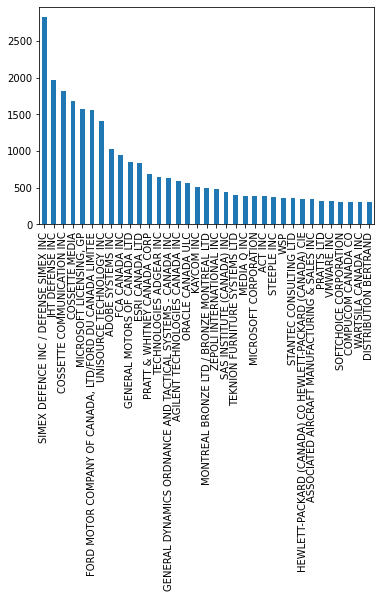

In [352]:
topSuppliers = editCH['supplier-standardized-name'].value_counts()
topSuppliers = topSuppliers[topSuppliers > 300]
topSuppliers.plot(kind = 'bar')

In [353]:
editCH.insert(9,'stantec-supplier','no')

In [354]:
editCH['stantec-supplier'] = np.where(editCH['supplier-standardized-name'].str.contains('STANTEC'), 'yes', editCH['stantec-supplier'])

In [355]:
editCH['stantec-supplier'].value_counts()

no     193551
yes       582
Name: stantec-supplier, dtype: int64

## Look at Subsets & How Attributes Link to the Class

In [356]:
#value counts were run for all attributes anything that looked distinct is included in the code below.
stantecData = editCH[editCH['stantec-supplier'] == 'yes']
stantecData['gsin-category'].value_counts()


C    405
B     59
E     56
5     18
R     18
H      6
T      5
U      5
A      4
D      4
N      1
S      1
Name: gsin-category, dtype: int64

<AxesSubplot:>

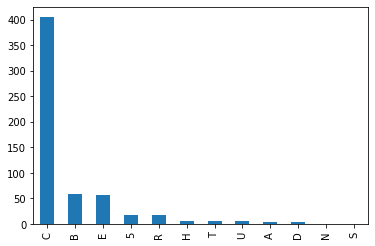

In [357]:
stantecData['gsin-category'].value_counts().plot(kind = 'bar')

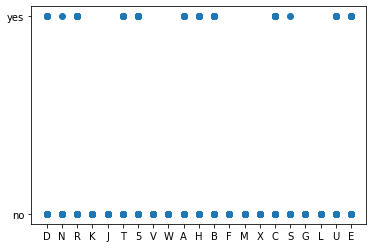

In [358]:
plt.scatter(editCH['gsin-category'],editCH['stantec-supplier'])

In [359]:
yesGsin = pd.DataFrame(stantecData['gsin-category'].value_counts().rename_axis('gsin').reset_index(name='stantec count'))
allGsin = pd.DataFrame(editCH['gsin-category'].value_counts().rename_axis('gsin').reset_index(name='all count'))
gsinMerge = pd.merge(allGsin, yesGsin, how = 'outer')
gsinMerge
#gsinMerge.plot(kind = 'bar')

,gsin,all count,stantec count
0,N,99022,1.0
1,V,18867,NaN
2,R,13485,18.0
3,T,12615,5.0
4,5,10881,18.0
5,C,7882,405.0
6,D,7768,4.0
7,J,5996,NaN
8,A,4296,4.0
9,K,3479,NaN


In [360]:
stantecData['gsin-description_en'].value_counts()

Engineering Services - Buildings                          131
Environmental Engineering Services - Real Property         56
Architectual Services - Buildings                          52
Geotechnical Studies - Licensed Engineers                  39
Environmental Services                                     33
                                                         ... 
Architect/Engineer Services - Industrial Buildings          1
Project Management Services                                 1
Internal and External Audits (Supply Arrangement PASS)      1
Professional Services / Financial Analysis                  1
Seminars                                                    1
Name: gsin-description_en, Length: 75, dtype: int64

<AxesSubplot:>

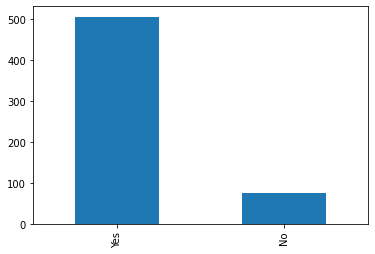

In [361]:
stantecData['competitive-tender_en'].value_counts().plot(kind = 'bar')

In [362]:
stantecData['supplier-address-city'].value_counts()

Ottawa              174
Vancouver           126
Edmonton             47
Dartmouth            39
Laval                19
Winnipeg             18
Burnaby              16
Markham              13
Regina               12
St.John's            11
Yellowknife          11
Victoria              9
Calgary               8
Quebec City           7
Moncton               7
Fredericton           6
Toronto               6
Charlottetown         5
Montreal,             5
Whitehorse            4
Ville Mont-Royal      4
Kitchener             3
Longueuil             3
Saint John            3
St. John's            3
Montréal              2
Inuvik                2
Saskatoon             2
Montreal              2
Rimouski              2
Surrey                1
Kamloops              1
Kelowna               1
Lethbridge            1
Iqaluit               1
Membertou             1
Mississauga           1
Gatineau              1
Sidney                1
Halifax               1
Labrador City         1
Saint-Laurent   

<AxesSubplot:>

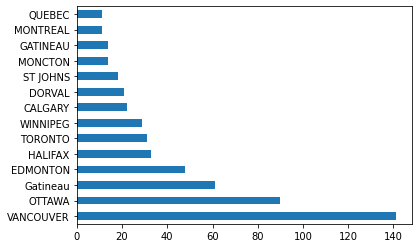

In [363]:
locateStantec = stantecData['contracting-address-city'].value_counts()
locateStantec = locateStantec[locateStantec > 10]
locateStantec.plot(kind = 'barh')

<AxesSubplot:>

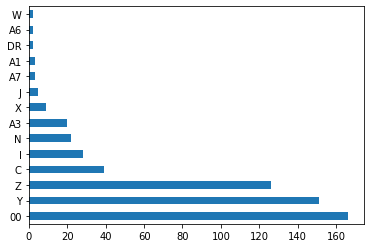

In [364]:
tradeStantec = stantecData['trade-agreement'].value_counts()
tradeStantec = tradeStantec[tradeStantec > 1]
tradeStantec.plot(kind = 'barh')

<AxesSubplot:>

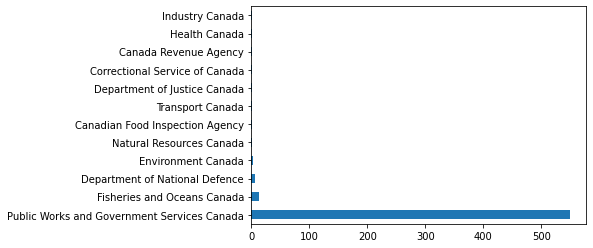

In [365]:
stantecData['end-user-entity_en'].value_counts().plot(kind = 'barh')

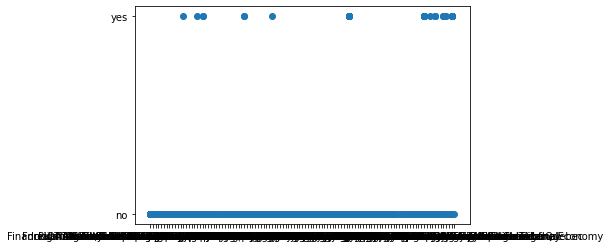

In [366]:
plt.scatter(editCH['end-user-entity_en'],editCH['stantec-supplier'])

<AxesSubplot:>

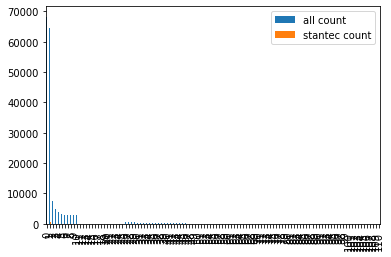

In [367]:
yesVal = pd.DataFrame(stantecData['end-user-entity_en'].value_counts().rename_axis('entity').reset_index(name='stantec count'))
allVal = pd.DataFrame(editCH['end-user-entity_en'].value_counts().rename_axis('entity').reset_index(name='all count'))
valMerge = pd.merge(allVal, yesVal, how = 'outer')
valMerge.plot(kind = 'bar')

In [368]:
stantecData['contracting-address-city'].value_counts()

VANCOUVER          141
OTTAWA              90
Gatineau            61
EDMONTON            48
HALIFAX             33
TORONTO             31
WINNIPEG            29
CALGARY             22
DORVAL              21
ST JOHNS            18
MONCTON             14
GATINEAU            14
MONTREAL            11
QUEBEC              11
CHARLOTTETOWN        6
NORTH YORK           4
WILLOWDALE           4
REGINA               4
VICTORIA             3
DARTMOUTH            2
Ottawa               2
BURLINGTON           2
RIMOUSKI             2
PETAWAWA             1
SAULT STE MARIE      1
SIDNEY               1
PRINCE ALBERT        1
KINGSTON             1
SYDNEY               1
SASKATOON            1
CORNER BROOK         1
MEAFORD              1
Name: contracting-address-city, dtype: int64

## Removing Non-Applicable GSIN Categories
Based on the analysis above, the GSIN Categories V, J, K, W, G, L, F, M, X have no Stantec supplier counts, and GSIN Category N only has one our of 97533. 

In [369]:
editCH.insert(27, 'remove-gsin', 'no')


In [370]:
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('V'), 'yes', editCH['remove-gsin'])
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('J'), 'yes', editCH['remove-gsin'])
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('K'), 'yes', editCH['remove-gsin'])
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('W'), 'yes', editCH['remove-gsin'])
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('G'), 'yes', editCH['remove-gsin'])
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('L'), 'yes', editCH['remove-gsin'])
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('F'), 'yes', editCH['remove-gsin'])
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('M'), 'yes', editCH['remove-gsin'])
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('X'), 'yes', editCH['remove-gsin'])
editCH['remove-gsin'] = np.where(editCH['gsin-category'].str.contains('N'), 'yes', editCH['remove-gsin'])

In [371]:
editCH['remove-gsin'].value_counts()

yes    130739
no      63394
Name: remove-gsin, dtype: int64

In [372]:
index_names = editCH[editCH['remove-gsin'] == 'yes'].index
editCH.drop(index_names, inplace = True)

## Reducing the Number of Unique End User Departments, GSIN Codes, Contracting Cities, Contracting Postal Code

In [373]:
editCH.insert(5,'gsin-description-top', editCH['gsin-description_en'])
editCH.insert(19,'end-user-entity-top', editCH['end-user-entity_en'])
editCH.insert(23,'contracting-address-city-top', editCH['contracting-address-city'])
editCH.insert(26,'contracting-address-postal-top', editCH['contracting-address-postal-code'])

In [374]:
frequencies = editCH['gsin-description-top'].value_counts(normalize=True, ascending=True)
mapping = editCH['gsin-description-top'].map(frequencies)
editCH['gsin-description-top'] = editCH['gsin-description-top'].mask(mapping < 0.005, 'Other')
editCH['gsin-description-top'].value_counts()

Other                                                                                                      23486
Informatics Professional Services                                                                           5590
Human Resource Services, Business Consulting/Change Management; Project Management Services                 3774
Advertising Media Planning/Buying                                                                           3376
Temporary Help Services, General Office Support                                                             1658
Translation Services                                                                                        1615
Engineering Services - Buildings                                                                            1427
Architectual Services - Buildings                                                                           1344
Information Products                                                                            

In [375]:
frequencies = editCH['end-user-entity-top'].value_counts(normalize=True, ascending=True)
mapping = editCH['end-user-entity-top'].map(frequencies)
editCH['end-user-entity-top'] = editCH['end-user-entity-top'].mask(mapping < 0.005, 'Other')
editCH['end-user-entity-top'].value_counts()

Public Works and Government Services Canada               35854
Department of National Defence                            10171
Other                                                      4521
Parks Canada                                               1647
Fisheries and Oceans Canada                                1325
Health Canada                                              1154
Natural Resources Canada                                    935
Employment and Social Development Canada                    883
Canadian Space Agency                                       857
Agriculture and Agri-Food Canada                            716
Industry Canada                                             705
Citizenship and Immigration Canada                          669
Environment Canada                                          606
Transport Canada                                            570
Foreign Affairs, Trade And Development (Department Of)      545
Veterans Affairs Canada                 

In [376]:
frequencies = editCH['contracting-address-city-top'].value_counts(normalize=True, ascending=True)
mapping = editCH['contracting-address-city-top'].map(frequencies)
editCH['contracting-address-city-top'] = editCH['contracting-address-city-top'].mask(mapping < 0.01, 'Other')
editCH['contracting-address-city-top'].value_counts()

OTTAWA           17058
GATINEAU         10250
Other             8536
Gatineau          7585
VANCOUVER         3243
MONTREAL          1889
HALIFAX           1880
EDMONTON          1753
QUEBEC            1665
WINNIPEG          1447
MONCTON           1277
TORONTO           1197
ST JOHNS          1004
CHARLOTTETOWN      917
MISSISSAUGA        811
CALGARY            784
ST HUBERT          741
BORDEN             683
DARTMOUTH          674
Name: contracting-address-city-top, dtype: int64

In [377]:
frequencies = editCH['contracting-address-postal-top'].value_counts(normalize=True, ascending=True)
mapping = editCH['contracting-address-postal-top'].map(frequencies)
editCH['contracting-address-postal-top'] = editCH['contracting-address-postal-top'].mask(mapping < 0.01, 'Other')
editCH['contracting-address-postal-top'].value_counts()

Other     24683
K1A0S5    17645
K1A0K2     2932
V6Z0B9     2605
M2N6A6     1596
T5J1S6     1535
H5A1L6     1365
K1A0K9     1294
B3J3C9     1141
E1C1H1     1105
R3B0T6     1026
K1A0H4      990
K1A0Z4      930
J3Y8Y9      854
L5B2N5      808
K1A0J9      789
A1C5T2      771
L0M1C0      683
K1A1L1      642
Name: contracting-address-postal-top, dtype: int64

## Attribute Selection

In [378]:
modelCH = editCH.drop(['contract-number', 'award-date', 'expiry-date', 'gsin', 'gsin-description_en', 'supplier-standardized-name', 'supplier-address-city', 'supplier-address-prov-state', 'supplier-address-postal-code', 'supplier-address-country', 'organization-employee-count_en', 'total-contract-value', 'end-user-entity_en', 'contracting-entity-office-name_en', 'contracting-address-street-1', 'contracting-address-city', 'contracting-address-postal-code', 'contracting-address-country', 'days-since-first-award', 'remove-gsin', 'award year', 'award day'], axis = 1)

In [379]:
modelCH.columns

Index(['gsin-description-top', 'gsin-category', 'competitive-tender_en',
       'solicitation-procedure-description_en', 'trade-agreement',
       'stantec-supplier', 'total-contract-value-normalized',
       'end-user-entity-top', 'contracting-address-city-top',
       'contracting-address-prov-state', 'contracting-address-postal-top',
       'days-since-first-award-normalized', 'award-year-normalized',
       'award month'],
      dtype='object')

## Clustering

In [380]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
trainReshape = modelCH['total-contract-value-normalized'].values.reshape(-1, 1)
clusterCV = kmeans.fit(trainReshape)
clusterCV.cluster_centers_

array([[0.06321759],
       [0.95542732],
       [0.24438324],
       [0.49130407],
       [0.12491418]])

In [381]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [382]:
'''kproto = KPrototypes(n_clusters = 3)
trainSet = modelCH[['gsin-category','total-contract-value-normalized']]
cluster = kproto.fit(trainSet, categorical = [0])
yPred = kproto.predict(trainSet, categorical = [0])
cluster.cluster_centroids_
'''

"kproto = KPrototypes(n_clusters = 3)\ntrainSet = modelCH[['gsin-category','total-contract-value-normalized']]\ncluster = kproto.fit(trainSet, categorical = [0])\nyPred = kproto.predict(trainSet, categorical = [0])\ncluster.cluster_centroids_\n"

In [383]:
#plt.scatter(trainSet['gsin-category'], trainSet['total-contract-value-normalized'], s = 50, c = yPred, cmap = plt.cm.Paired)
#plt.show()

In [384]:
kmode = KModes(n_clusters = 3)
trainSet2 = modelCH[['gsin-category', 'end-user-entity-top']]
cluster2 = kmode.fit(trainSet2)
yPred2 = kmode.predict(trainSet2)
cluster2.cluster_centroids_


array([['R', 'Public Works and Government Services Canada'],
       ['T', 'Other'],
       ['5', 'Public Works and Government Services Canada']], dtype='<U43')

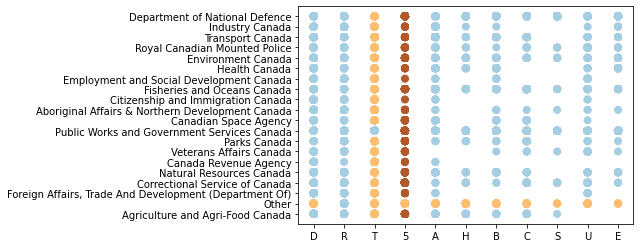

In [385]:
plt.scatter(trainSet2['gsin-category'], trainSet2['end-user-entity-top'], s = 50, c = yPred2, cmap = plt.cm.Paired)
plt.show()

## Creating Dummy Values

In [386]:
#Dummy 1 for the dependent variable

cat1 = pd.get_dummies(modelCH['stantec-supplier'],drop_first=True)
cat1 = cat1.rename({'yes':'stantec-supplier-mod'}, axis = 1)
modelCH = pd.concat([modelCH,cat1],axis=1)
cat1.shape


(63394, 1)

In [387]:
#Dummy 2 for gsin-description-top

cat2 = pd.get_dummies(modelCH['gsin-description-top'], prefix = 'top-gsin')
modelCH = pd.concat([modelCH,cat2],axis=1)
cat2.shape

(63394, 44)

In [388]:
#Dummy 3 for gsin-category

cat3 = pd.get_dummies(modelCH['gsin-category'], prefix = 'gsin_cat')
modelCH = pd.concat([modelCH,cat3],axis=1)
cat3.shape

(63394, 11)

In [389]:
#Dummy 4 for competitive-tender_en

cat4 = pd.get_dummies(modelCH['competitive-tender_en'], prefix = 'competitive_tender', drop_first=True)
modelCH = pd.concat([modelCH,cat4],axis=1)
cat4.shape

(63394, 1)

In [390]:
#Dummy 5 for solicitation-procedure-description_en

cat5 = pd.get_dummies(modelCH['solicitation-procedure-description_en'], prefix = 'solicitation_procedure')
modelCH = pd.concat([modelCH,cat5],axis=1)
cat5.shape

(63394, 4)

In [391]:
#Dummy 6 for trade-agreement

cat6 = pd.get_dummies(modelCH['trade-agreement'], prefix = 'trade-agreement')
modelCH = pd.concat([modelCH,cat6],axis=1)
cat6.shape

(63394, 33)

In [392]:
#Dummy 7 for end-user-entity-top

cat7 = pd.get_dummies(modelCH['end-user-entity-top'], prefix = 'end_user')
modelCH = pd.concat([modelCH,cat7],axis=1)
cat7.shape

(63394, 20)

In [393]:
#Dummy 8 for contracting-address-city-top

cat8 = pd.get_dummies(modelCH['contracting-address-city-top'], prefix = 'contracting-city')
modelCH = pd.concat([modelCH,cat8],axis=1)
cat8.shape

(63394, 19)

In [394]:
#Dummy 9 for contracting-address-prov-state

cat9 = pd.get_dummies(modelCH['contracting-address-prov-state'], prefix = 'contracting_prov')
train = pd.concat([modelCH,cat9],axis=1)
cat9.shape


(63394, 13)

In [395]:
#Dummy 10 for award month

cat10 = pd.get_dummies(modelCH['award month'], prefix = 'award month')
modelCH = pd.concat([modelCH,cat10],axis=1)
cat10.shape


(63394, 12)

In [396]:
'''Main Categories
'gsin-description-top'
'gsin-category'
'competitive-tender_en'
'solicitation-procedure-description_en'
'trade-agreement'
'total-contract-value-normalized'
'end-user-entity-top'
'contracting-address-city-top'
'contracting-address-prov-state'
'days-since-first-award-normalized'
'award-year-normalized'
'award month'
'stantec-supplier'
'''

"Main Categories\n'gsin-description-top'\n'gsin-category'\n'competitive-tender_en'\n'solicitation-procedure-description_en'\n'trade-agreement'\n'total-contract-value-normalized'\n'end-user-entity-top'\n'contracting-address-city-top'\n'contracting-address-prov-state'\n'days-since-first-award-normalized'\n'award-year-normalized'\n'award month'\n'stantec-supplier'\n"

In [397]:
modelCH.columns

modelCH = modelCH.drop(['gsin-description-top', 'gsin-category', 'competitive-tender_en', 'contracting-address-postal-top', 'solicitation-procedure-description_en', 'trade-agreement', 'end-user-entity-top', 'contracting-address-city-top', 'contracting-address-prov-state', 'award month'], axis = 1)

## Feature Evaluation Tools

### Manual Linear Regression Approach Using R Score

In [398]:
#Creating a loop to enable model evaluation using r score on full set of variables - code development in progress

from sklearn import linear_model

featureEvalDatax = modelCH.drop(['stantec-supplier-mod', 'stantec-supplier'], axis = 1)
featureEvalDatay = modelCH['stantec-supplier-mod']

a=0
topAttribute = []
for attribute in featureEvalDatax:
    x = featureEvalDatax.iloc[:, a:a+1:1]
    y = featureEvalDatay
    regrFE = linear_model.LinearRegression().fit(x, y)
    topAttribute.append((regrFE.score(x, y), featureEvalDatax.columns[a]))
    a=a+1

len(topAttribute)

147

In [399]:
topAttributeSort = sorted(topAttribute, key=lambda tup: tup[0], reverse = True)
print(topAttributeSort)

[(0.02786861309847022, 'gsin_cat_C'), (0.017317034250872387, 'top-gsin_Engineering Services - Buildings'), (0.00957377475996446, 'trade-agreement_Z'), (0.006990385447206093, 'contracting-city_VANCOUVER'), (0.005368441613116781, 'end_user_Public Works and Government Services Canada'), (0.003970352469997218, 'top-gsin_Architect and Engineering Services - Buildings'), (0.0033554395959797256, 'gsin_cat_B'), (0.002869092648035809, 'trade-agreement_I'), (0.0021034368700646455, 'gsin_cat_T'), (0.002079336301876511, 'top-gsin_Architectual Services - Buildings'), (0.001824215293542486, 'gsin_cat_R'), (0.0017054229343257399, 'trade-agreement_CKZ'), (0.0015617512604477746, 'top-gsin_Environmental Services'), (0.0015473995425828724, 'end_user_Department of National Defence'), (0.0015375898359729634, 'gsin_cat_E'), (0.0012918849798727594, 'contracting-city_GATINEAU'), (0.0012871440347090868, 'gsin_cat_5'), (0.0012092761727415802, 'trade-agreement_A7'), (0.0011506187452093863, 'gsin_cat_D'), (0.0011

In [400]:
#Top 12
'gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services'

#Top 20
'gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services', 'end_user_Department of National Defence', 'gsin_cat_E', 'contracting-city_GATINEAU', 'gsin_cat_5', 'trade-agreement_A7', 'gsin_cat_D', 'contracting-city_EDMONTON', 'trade-agreement_A3'

('gsin_cat_C',
 'top-gsin_Engineering Services - Buildings',
 'trade-agreement_Z',
 'contracting-city_VANCOUVER',
 'end_user_Public Works and Government Services Canada',
 'gsin_cat_B',
 'trade-agreement_I',
 'gsin_cat_T',
 'top-gsin_Architectual Services - Buildings',
 'gsin_cat_R',
 'trade-agreement_CKZ',
 'top-gsin_Environmental Services',
 'end_user_Department of National Defence',
 'gsin_cat_E',
 'contracting-city_GATINEAU',
 'gsin_cat_5',
 'trade-agreement_A7',
 'gsin_cat_D',
 'contracting-city_EDMONTON',
 'trade-agreement_A3')

### Automated SelectKBest Approach

In [401]:
#Univariate Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

bestfeatures = SelectKBest(score_func = f_classif, k=20)
fitBF = bestfeatures.fit(featureEvalDatax,featureEvalDatay)
BFscores = pd.DataFrame(fitBF.scores_)
BFcolumns = pd.DataFrame(featureEvalDatax.columns)
featureScores = pd.concat([BFcolumns,BFscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(20,'Score')) 

                                                 Specs        Score
50                                          gsin_cat_C  1817.292544
18           top-gsin_Engineering Services - Buildings  1117.106405
95                                   trade-agreement_Z   612.767225
133                         contracting-city_VANCOUVER   446.254002
112  end_user_Public Works and Government Services ...   342.153080
6    top-gsin_Architect and Engineering Services - ...   252.691860
49                                          gsin_cat_B   213.424159
83                                   trade-agreement_I   182.400846
56                                          gsin_cat_T   133.622136
8           top-gsin_Architectual Services - Buildings   132.087942
54                                          gsin_cat_R   115.851995
79                                 trade-agreement_CKZ   108.294859
19                     top-gsin_Environmental Services    99.157395
102            end_user_Department of National D

### Automated ExtraTreesClassifier

In [402]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
ETC = ExtraTreesClassifier()
ETC.fit(featureEvalDatax,featureEvalDatay)
feat_importances = pd.Series(ETC.feature_importances_, index = featureEvalDatax.columns)
print(feat_importances.nlargest(10))
#feat_importances.nlargest(10).plot(kind='barh')
#plt.show()

total-contract-value-normalized              0.222165
days-since-first-award-normalized            0.164690
award-year-normalized                        0.084673
gsin_cat_C                                   0.020275
top-gsin_Engineering Services - Buildings    0.016999
award month_10                               0.016750
award month_02                               0.015859
contracting-city_OTTAWA                      0.015532
contracting-city_VANCOUVER                   0.015029
award month_08                               0.014426
dtype: float64


## Regression without Balancing for Feature Evaluation - Not Used

In [403]:
xTrain = pd.DataFrame(modelCH, columns = ['gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services'])
yTrain = pd.DataFrame(modelCH, columns = ['stantec-supplier-mod'])

regr = linear_model.LinearRegression().fit(xTrain, yTrain)
predTrain = regr.predict(xTrain)

regr.coef_


array([[ 3.46231059e-02,  4.26640196e-02,  1.50524608e-02,
         1.72809728e-02,  5.93196415e-03,  4.39877866e-02,
        -4.52587536e-03,  5.59887501e-04, -9.25775359e-03,
        -2.81259949e-03,  9.42207670e-01,  3.36950222e-02]])

In [404]:
regr.intercept_

array([-4.37125066e-05])

In [405]:
regr.score(xTrain, yTrain)

0.044883902130922526

## Balancing for Feature Evaluation - Not Used
Using the random under-sampling method.

In [406]:
modelCH['stantec-supplier'].value_counts()

no     62813
yes      581
Name: stantec-supplier, dtype: int64

In [407]:
count_class_0, count_class_1 = modelCH['stantec-supplier'].value_counts()
ch_class_0 = modelCH[modelCH['stantec-supplier'] == 'no']
ch_class_1 = modelCH[modelCH['stantec-supplier'] == 'yes']
ch_class_0_under = ch_class_0.sample(count_class_1)
modelCHUnder = pd.concat([ch_class_0_under, ch_class_1], axis=0)
print(modelCHUnder['stantec-supplier'].value_counts())

no     581
yes    581
Name: stantec-supplier, dtype: int64


In [408]:
#Random over-sampling
#ch_class_1_over = ch_class_1.sample(count_class_0, replace=True)
#modelCHOver = pd.concat([ch_class_0, ch_class_1_over], axis=0)
#print(modelCHOver['stantec-supplier'].value_counts())

## Regression with Balancing FOR Feature Evaluation - Not Used

In [409]:
xTrainBalance = pd.DataFrame(modelCHUnder, columns = ['gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services'])
yTrainBalance = pd.DataFrame(modelCHUnder, columns = ['stantec-supplier-mod'])

regrBalance = linear_model.LinearRegression().fit(xTrainBalance, yTrainBalance)
predTrainBalance = regrBalance.predict(xTrainBalance)

regrBalance.coef_

array([[ 0.48076456,  0.04013402,  0.06579057,  0.08695126,  0.1945516 ,
         0.5793359 , -0.14492431, -0.06269766, -0.01105547, -0.13465156,
         0.10906739,  0.52845545]])

In [410]:
regrBalance.intercept_

array([0.12866518])

In [411]:
regrBalance.score(xTrainBalance, yTrainBalance)

0.5361260747143395

## Creating the Test & Training Set 

In [412]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits=5, shuffle=True, random_state = 2)
result = next(kf5.split(modelCH, None))
train = modelCH.iloc[result[0]]
test = modelCH.iloc[result[1]]

## Unbalanced Linear Model

In [413]:
#Unbalanced regression model evaluation
from sklearn.metrics import confusion_matrix

xTrainEval = pd.DataFrame(train, columns = ['gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services'])
yTrainEval = pd.DataFrame(train, columns = ['stantec-supplier-mod'])
xTestEval = pd.DataFrame(test, columns = ['gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services'])
yTestEval = pd.DataFrame(test, columns = ['stantec-supplier-mod'])

In [414]:
regr2 = linear_model.LinearRegression().fit(xTrainEval, yTrainEval)
predTrain = regr2.predict(xTrainEval)
predTest = regr2.predict(xTestEval)
#confusion_matrix(yTestEval, predTest)
yTestEval.value_counts()
#note that a confusion matrix does not work here because of the result is a probablility not an outcome - will need to swtich to a classification model for proper results

stantec-supplier-mod
0                       12552
1                         127
dtype: int64

In [415]:
#0.01 used for prediction since approximately 127 of 12679 or 0.01% of the test values are positive

outcome = []
for pred in predTest:
    if (pred > 0.01):
        outcome.append(1)
    elif (pred <= 0.01):
        outcome.append(0)

confusion_matrix(yTestEval, outcome)

array([[10285,  2267],
       [   12,   115]], dtype=int64)

In [416]:
from sklearn.metrics import classification_report

print(classification_report(yTestEval, outcome))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     12552
           1       0.05      0.91      0.09       127

    accuracy                           0.82     12679
   macro avg       0.52      0.86      0.50     12679
weighted avg       0.99      0.82      0.89     12679



In [417]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yTestEval, outcome)
print(auc)

0.8624515715411291


## Creating the Balanced Dataset for Use in All Models

In [418]:
#Train Balanced model
count_class_0, count_class_1 = train['stantec-supplier'].value_counts()
ch_class_0 = train[train['stantec-supplier'] == 'no']
ch_class_1 = train[train['stantec-supplier'] == 'yes']
ch_class_0_under = ch_class_0.sample(count_class_1)
trainUnder = pd.concat([ch_class_0_under, ch_class_1], axis=0)
print(trainUnder['stantec-supplier'].value_counts())


no     454
yes    454
Name: stantec-supplier, dtype: int64


In [419]:
#Test Balanced model - not used
#count_class_2, count_class_3 = test['stantec-supplier'].value_counts()
#ch_class_2 = test[test['stantec-supplier'] == 'no']
#ch_class_3 = test[test['stantec-supplier'] == 'yes']
#ch_class_2_under = ch_class_2.sample(count_class_3)
#TestUnder = pd.concat([ch_class_2_under, ch_class_3], axis=0)
#print(TestUnder['stantec-supplier'].value_counts())

## Linear Model with All the Features

In [420]:
trainUnderAll = trainUnder.drop(['stantec-supplier-mod', 'stantec-supplier'], axis = 1)
testAll = test.drop(['stantec-supplier-mod', 'stantec-supplier'], axis = 1)

In [421]:
#Balanced regression model evaluation - All Features
xTrainEvalE = pd.DataFrame(trainUnderAll)
yTrainEvalE = pd.DataFrame(trainUnder, columns = ['stantec-supplier-mod'])
xTestEvalE = pd.DataFrame(testAll)
yTestEvalE = pd.DataFrame(test, columns = ['stantec-supplier-mod'])

In [422]:
regrBalance4 = linear_model.LinearRegression().fit(xTrainEvalE, yTrainEvalE)
predTrainBalance4 = regrBalance4.predict(xTrainEvalE)
predTestBalance4 = regrBalance4.predict(xTestEvalE)

outcome4 = []
for pred in predTestBalance4:
    if (pred > 0.5):
        outcome4.append(1)
    elif (pred <= 0.5):
        outcome4.append(0)

confusion_matrix(yTestEvalE, outcome4)

array([[10486,  2066],
       [   10,   117]], dtype=int64)

In [423]:
print(classification_report(yTestEvalE, outcome4))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     12552
           1       0.05      0.92      0.10       127

    accuracy                           0.84     12679
   macro avg       0.53      0.88      0.51     12679
weighted avg       0.99      0.84      0.90     12679



In [424]:
auc = roc_auc_score(yTestEvalE, outcome4)
print(auc)

0.8783322794497724


## Balanced Linear Model

In [425]:
#BALANCED

# SelectKBest Top 13
# 'gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'top-gsin_Architect and Engineering Services - Buildings', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services'

# SelectKBest Top 16
# 'gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'top-gsin_Architect and Engineering Services - Buildings', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services', 'end_user_Department of National Defence', 'gsin_cat_E', 'contracting-city_GATINEAU'

# RFE Top 16
# 'gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'end_user_Public Works and Government Services Canada', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'gsin_cat_E', 'contracting-city_GATINEAU'

# Manual Feature Evaluation Top 12: 
# 'gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services'


In [426]:
#Balanced regression model evaluation - SelectKBest Top 16
xTrainEvalB = pd.DataFrame(trainUnder, columns = ['gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'top-gsin_Architect and Engineering Services - Buildings', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services', 'end_user_Department of National Defence', 'gsin_cat_E', 'contracting-city_GATINEAU'])
yTrainEvalB = pd.DataFrame(trainUnder, columns = ['stantec-supplier-mod'])
xTestEvalB = pd.DataFrame(test, columns = ['gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'top-gsin_Architect and Engineering Services - Buildings', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services', 'end_user_Department of National Defence', 'gsin_cat_E', 'contracting-city_GATINEAU'])
yTestEvalB = pd.DataFrame(test, columns = ['stantec-supplier-mod'])

In [427]:
regrBalance2 = linear_model.LinearRegression().fit(xTrainEvalB, yTrainEvalB)
predTrainBalance2 = regrBalance2.predict(xTrainEvalB)
predTestBalance2 = regrBalance2.predict(xTestEvalB)

outcome2 = []
for pred in predTestBalance2:
    if (pred > 0.5):
        outcome2.append(1)
    elif (pred <= 0.5):
        outcome2.append(0)

confusion_matrix(yTestEvalB, outcome2)

array([[10676,  1876],
       [   10,   117]], dtype=int64)

In [428]:
print(classification_report(yTestEvalB, outcome2))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     12552
           1       0.06      0.92      0.11       127

    accuracy                           0.85     12679
   macro avg       0.53      0.89      0.51     12679
weighted avg       0.99      0.85      0.91     12679



In [429]:
print(roc_auc_score(yTestEvalB, outcome2))

0.8859007944274653


## Testing RFE for Logistic Regression - In Development

In [430]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logReg3 = LogisticRegression()
rfe = RFE(logReg3)
rfe = rfe.fit(xTrainEvalB,yTrainEvalB)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversio

[ True False False False  True False  True  True  True False False False
  True False  True  True]
[1 3 6 9 1 4 1 1 1 5 7 8 1 2 1 1]


C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [431]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('s', rfe),('logm',logReg3)])
logRegFit2 = pipeline.fit(xTrainEvalB, yTrainEvalB)
logRegPred2 = pipeline.predict(xTestEvalB)
score2 = pipeline.score(xTestEvalB, yTestEvalB)
print(score2)


C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversio

0.8545626626705576


C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [432]:
from sklearn import metrics

confMatrix2 = metrics.confusion_matrix(yTestEvalB, logRegPred2)
print(confMatrix2)

[[10719  1833]
 [   11   116]]


In [433]:
print(classification_report(yTestEvalB, logRegPred2))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     12552
           1       0.06      0.91      0.11       127

    accuracy                           0.85     12679
   macro avg       0.53      0.88      0.52     12679
weighted avg       0.99      0.85      0.91     12679



In [434]:
print(roc_auc_score(yTestEvalB, logRegPred2))

0.8836766609957695


## Applying Kfold with a Balanced Linear Regression - Cannout Use because you aren't testing on the full dataset
NEED ADVICE

In [435]:
#Balanced model for Kfold
new_count_class_0, new_count_class_1 = modelCH['stantec-supplier'].value_counts()
new_ch_class_0 = modelCH[modelCH['stantec-supplier'] == 'no']
new_ch_class_1 = modelCH[modelCH['stantec-supplier'] == 'yes']
new_ch_class_0_under = new_ch_class_0.sample(new_count_class_1)
balanceUnder = pd.concat([new_ch_class_0_under, new_ch_class_1], axis=0)
print(balanceUnder['stantec-supplier'].value_counts())

no     581
yes    581
Name: stantec-supplier, dtype: int64


In [436]:
#Balanced regression model evaluation with cross validation
xTrainEvalC = pd.DataFrame(balanceUnder, columns = ['gsin_cat_C', 'top-gsin_Engineering Services - Buildings', 'trade-agreement_Z', 'contracting-city_VANCOUVER', 'end_user_Public Works and Government Services Canada', 'gsin_cat_B', 'trade-agreement_I', 'gsin_cat_T', 'top-gsin_Architectual Services - Buildings', 'gsin_cat_R', 'trade-agreement_CKZ', 'top-gsin_Environmental Services'])
yTrainEvalC = pd.DataFrame(balanceUnder, columns = ['stantec-supplier-mod'])

regrBalance3 = linear_model.LinearRegression()

In [437]:
from sklearn.model_selection import cross_validate

kf5 = KFold(n_splits=5, shuffle=True, random_state = 1)
scoreCV2 = cross_validate(regrBalance3, xTrainEvalC, yTrainEvalC, cv=kf5)
print(scoreCV2)

{'fit_time': array([0.01193786, 0.        , 0.        , 0.01562214, 0.        ]), 'score_time': array([0.        , 0.01572752, 0.        , 0.        , 0.01562071]), 'test_score': array([0.42249453, 0.52833496, 0.5795531 , 0.55198443, 0.52756609])}


In [438]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regrBalance3, xTrainEvalC, yTrainEvalC, cv=kf5)
scores   

array([0.42249453, 0.52833496, 0.5795531 , 0.55198443, 0.52756609])

In [439]:
from sklearn.model_selection import cross_val_predict

linRegPred = cross_val_predict(regrBalance3, xTrainEvalC, yTrainEvalC, cv=kf5)
print(linRegPred)

[[0.14812989]
 [0.19140648]
 [0.24118264]
 ...
 [0.62731674]
 [0.62299084]
 [0.71648607]]


In [440]:
outcome3 = []
for pred in linRegPred:
    if (pred > 0.5):
        outcome3.append(1)
    elif (pred <= 0.5):
        outcome3.append(0)

len(outcome3)

1162

In [441]:
confMatrixLinReg = confusion_matrix(yTrainEvalC, outcome3)
print(confMatrixLinReg)

[[493  88]
 [ 84 497]]


In [442]:
print(classification_report(yTrainEvalC, outcome3))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       581
           1       0.85      0.86      0.85       581

    accuracy                           0.85      1162
   macro avg       0.85      0.85      0.85      1162
weighted avg       0.85      0.85      0.85      1162



In [443]:
print(roc_auc_score(yTrainEvalC, outcome3))

0.8519793459552496


## Logistic Regression Classifier
Using the same inputs as the Balanced regression model evaluation

In [444]:
logReg = LogisticRegression()

### All Features

In [445]:
logRegFit = logReg.fit(xTrainEvalE, yTrainEvalE)
logRegPred = logRegFit.predict(xTestEvalE)
score = logReg.score(xTestEvalE, yTestEvalE)
print(score)

0.8546415332439466


C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [446]:
from sklearn import metrics

confMatrix = metrics.confusion_matrix(yTestEvalE, logRegPred)
print(confMatrix)

[[10721  1831]
 [   12   115]]


In [447]:
print(classification_report(yTestEvalE, logRegPred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     12552
           1       0.06      0.91      0.11       127

    accuracy                           0.85     12679
   macro avg       0.53      0.88      0.52     12679
weighted avg       0.99      0.85      0.91     12679



In [448]:
print(roc_auc_score(yTestEvalE, logRegPred))

0.8798193217004662


### Top Features

In [449]:
logRegFit2 = logReg.fit(xTrainEvalB, yTrainEvalB)
logRegPred2 = logRegFit2.predict(xTestEvalB)
score2 = logReg.score(xTestEvalB, yTestEvalB)
print(score2)

0.8569287798722297


C:\Users\alana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [450]:
confMatrix2 = metrics.confusion_matrix(yTestEvalB, logRegPred2)
print(confMatrix2)

[[10750  1802]
 [   12   115]]


In [451]:
print(classification_report(yTestEvalB, logRegPred2))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     12552
           1       0.06      0.91      0.11       127

    accuracy                           0.86     12679
   macro avg       0.53      0.88      0.52     12679
weighted avg       0.99      0.86      0.91     12679



In [452]:
print(roc_auc_score(yTestEvalB, logRegPred2))

0.8809745160917982


## Decision Trees Classifier
Using the same inputs as the Balanced regression model evaluation

In [453]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

### All Features

In [454]:
dtFit = dt.fit(xTrainEvalE, yTrainEvalE)
dtPred = dtFit.predict(xTestEvalE)
dtScore = dtFit.score(xTestEvalE, yTestEvalE)
print(dtScore)

0.8043221074217209


In [455]:
dtConfMatrix = metrics.confusion_matrix(yTestEvalE, dtPred)
print(dtConfMatrix)

[[10088  2464]
 [   17   110]]


In [456]:
print(classification_report(yTestEvalE, dtPred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     12552
           1       0.04      0.87      0.08       127

    accuracy                           0.80     12679
   macro avg       0.52      0.83      0.49     12679
weighted avg       0.99      0.80      0.88     12679



In [457]:
print(roc_auc_score(yTestEvalE, dtPred))

0.8349191771678636


[Text(235.58444446938043, 212.71304347826086, 'X[50] <= 0.5\ngini = 0.5\nsamples = 908\nvalue = [454, 454]'),
 Text(170.19971090128615, 203.2591304347826, 'X[49] <= 0.5\ngini = 0.382\nsamples = 545\nvalue = [405, 140]'),
 Text(129.75323782398644, 193.80521739130435, 'X[52] <= 0.5\ngini = 0.315\nsamples = 491\nvalue = [395, 96]'),
 Text(89.42886253835609, 184.3513043478261, 'X[53] <= 0.5\ngini = 0.211\nsamples = 426\nvalue = [375, 51]'),
 Text(69.06192629104916, 174.89739130434782, 'X[112] <= 0.5\ngini = 0.193\nsamples = 416\nvalue = [371, 45]'),
 Text(36.72155121760136, 165.44347826086957, 'X[105] <= 0.5\ngini = 0.082\nsamples = 187\nvalue = [179, 8]'),
 Text(25.879950381928577, 155.98956521739132, 'X[98] <= 0.5\ngini = 0.044\nsamples = 176\nvalue = [172, 4]'),
 Text(18.185911079193055, 146.53565217391304, 'X[1] <= 0.961\ngini = 0.034\nsamples = 174\nvalue = [171, 3]'),
 Text(11.191329894888034, 137.08173913043478, 'X[1] <= 0.011\ngini = 0.023\nsamples = 171\nvalue = [169, 2]'),
 Text(

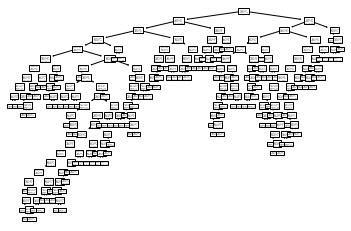

In [458]:
from sklearn import tree
tree.plot_tree(dtFit)
 

### Top Features

In [459]:
dtFit2 = dt.fit(xTrainEvalB, yTrainEvalB)
dtPred2 = dtFit2.predict(xTestEvalB)
dtScore2 = dtFit2.score(xTestEvalB, yTestEvalB)
print(dtScore2)


0.8659200252385835


In [460]:
dtConfMatrix2 = metrics.confusion_matrix(yTestEvalB, dtPred2)
print(dtConfMatrix2)

[[10864  1688]
 [   12   115]]


In [461]:
print(classification_report(yTestEvalB, dtPred2))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     12552
           1       0.06      0.91      0.12       127

    accuracy                           0.87     12679
   macro avg       0.53      0.89      0.52     12679
weighted avg       0.99      0.87      0.92     12679



In [462]:
print(roc_auc_score(yTestEvalB, dtPred2))

0.8855156250784139


[Text(228.51330882352943, 206.56799999999998, 'X[0] <= 0.5\ngini = 0.5\nsamples = 908\nvalue = [454, 454]'),
 Text(159.39926470588236, 184.824, 'X[6] <= 0.5\ngini = 0.382\nsamples = 545\nvalue = [405, 140]'),
 Text(121.85735294117647, 163.07999999999998, 'X[14] <= 0.5\ngini = 0.315\nsamples = 491\nvalue = [395, 96]'),
 Text(76.31470588235294, 141.336, 'X[4] <= 0.5\ngini = 0.211\nsamples = 426\nvalue = [375, 51]'),
 Text(42.34235294117647, 119.592, 'X[7] <= 0.5\ngini = 0.08\nsamples = 191\nvalue = [183, 8]'),
 Text(25.60235294117647, 97.848, 'X[3] <= 0.5\ngini = 0.043\nsamples = 135\nvalue = [132, 3]'),
 Text(15.75529411764706, 76.10399999999998, 'X[10] <= 0.5\ngini = 0.03\nsamples = 133\nvalue = [131, 2]'),
 Text(7.87764705882353, 54.360000000000014, 'X[13] <= 0.5\ngini = 0.016\nsamples = 121\nvalue = [120, 1]'),
 Text(3.938823529411765, 32.615999999999985, 'gini = 0.0\nsamples = 77\nvalue = [77, 0]'),
 Text(11.816470588235294, 32.615999999999985, 'X[8] <= 0.5\ngini = 0.044\nsamples = 

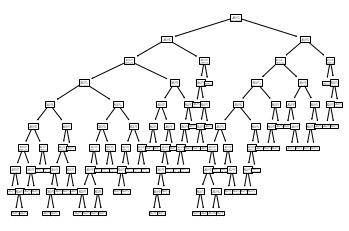

In [463]:
tree.plot_tree(dtFit2)

<BarContainer object of 16 artists>

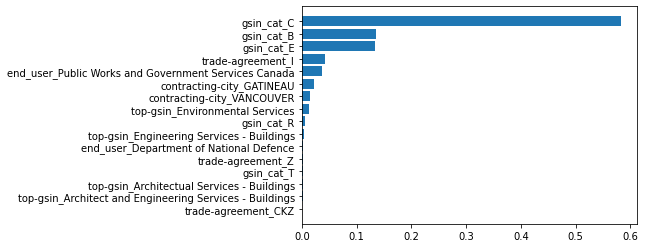

In [464]:
sorted_idx2 = dt.feature_importances_.argsort()
plt.barh(xTrainEvalB.columns[sorted_idx2],dt.feature_importances_[sorted_idx2])

### Extra Trees Classifier Top 10 Features

In [465]:
#Balanced regression model evaluation - Extra Trees Classifier Top 10
xTrainEvalD = pd.DataFrame(trainUnder, columns = ['total-contract-value-normalized', 'days-since-first-award-normalized', 'award-year-normalized', 'gsin_cat_C', 'award month_10', 'top-gsin_Engineering Services - Buildings', 'award month_02', 'award month_08', 'award month_03', 'contracting-city_OTTAWA'])
yTrainEvalD = pd.DataFrame(trainUnder, columns = ['stantec-supplier-mod'])
xTestEvalD = pd.DataFrame(test, columns = ['total-contract-value-normalized', 'days-since-first-award-normalized', 'award-year-normalized', 'gsin_cat_C', 'award month_10', 'top-gsin_Engineering Services - Buildings', 'award month_02', 'award month_08', 'award month_03', 'contracting-city_OTTAWA'])
yTestEvalD = pd.DataFrame(test, columns = ['stantec-supplier-mod'])

In [466]:
dtFit3 = dt.fit(xTrainEvalD, yTrainEvalD)
dtPred3 = dtFit3.predict(xTestEvalD)
dtScore3 = dtFit3.score(xTestEvalD, yTestEvalD)
print(dtScore3)

0.7193784998816941


In [467]:
dtConfMatrix3 = metrics.confusion_matrix(yTestEvalD, dtPred3)
print(dtConfMatrix3)

[[9021 3531]
 [  27  100]]


In [468]:
print(classification_report(yTestEvalD, dtPred3))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     12552
           1       0.03      0.79      0.05       127

    accuracy                           0.72     12679
   macro avg       0.51      0.75      0.44     12679
weighted avg       0.99      0.72      0.83     12679



In [469]:
print(roc_auc_score(yTestEvalD, dtPred3))

0.7530459116845576


## Random Forest Classifier
Using the same inputs as the Balanced regression model evaluation

In [470]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)

### All Features

In [471]:
rfFit = rf.fit(xTrainEvalE, yTrainEvalE)
rfPred = rfFit.predict(xTestEvalE)
rfScore = rfFit.score(xTestEvalE, yTestEvalE)
print(rfScore)

C:\Users\alana\AppData\Local\Temp/ipykernel_7848/2208538137.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfFit = rf.fit(xTrainEvalE, yTrainEvalE)


0.8484896285195993


In [472]:
rfConfMatrix = metrics.confusion_matrix(yTestEvalE, rfPred)
print(rfConfMatrix)

[[10644  1908]
 [   13   114]]


In [473]:
print(classification_report(yTestEvalE, rfPred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     12552
           1       0.06      0.90      0.11       127

    accuracy                           0.85     12679
   macro avg       0.53      0.87      0.51     12679
weighted avg       0.99      0.85      0.91     12679



In [474]:
print(roc_auc_score(yTestEvalE, rfPred))

0.8728150735460171


In [475]:
sorted_idx = rf.feature_importances_.argsort()
print(sorted_idx)

[ 66  81  89  78  39  91  82  77  74  72  69  76  86 101  97  37  68  38
  73  24  55  40  10  79 113   3  87  20  70  22  45  64  99  96  32  36
  71  90 130 115  11 100  13  30 124  27  28 106  88  41 104 111  23 116
  42  15   5  21 108 119  98 109  33  29 107 114 103  65  59  44  46 129
  14  31  34  16  93  92  12 117  84   6  67  25   4  80  85  17 105 132
 125 123 118  53  43 110 144   9   7 143  75 131  48 146 134 139  57 141
 122  62 126  58 128 140   8 135 136 142 120  61 145  26 138  60 137  63
 127  19 133  94  52 121  35 102  95  51  18  47  49  54  56   2  83 112
   0   1  50]


<BarContainer object of 147 artists>

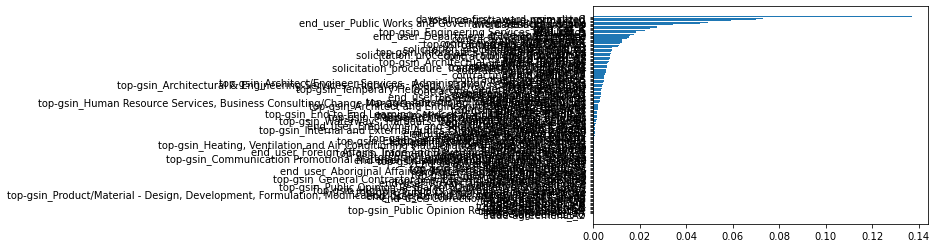

In [476]:
plt.barh(xTrainEvalE.columns[sorted_idx],rf.feature_importances_[sorted_idx])

### Top Features

In [477]:
rfFit2 = rf.fit(xTrainEvalB, yTrainEvalB)
rfPred2 = rfFit2.predict(xTestEvalB)
rfScore2 = rfFit2.score(xTestEvalB, yTestEvalB)
print(rfScore2)

C:\Users\alana\AppData\Local\Temp/ipykernel_7848/2504136405.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfFit2 = rf.fit(xTrainEvalB, yTrainEvalB)


0.8631595551699661


In [478]:
rfConfMatrix = metrics.confusion_matrix(yTestEvalB, rfPred2)
print(rfConfMatrix)

[[10828  1724]
 [   11   116]]


In [479]:
print(classification_report(yTestEvalB, rfPred2))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     12552
           1       0.06      0.91      0.12       127

    accuracy                           0.86     12679
   macro avg       0.53      0.89      0.52     12679
weighted avg       0.99      0.86      0.92     12679



In [480]:
print(roc_auc_score(yTestEvalB, rfPred2))

0.8880185985356037


<BarContainer object of 16 artists>

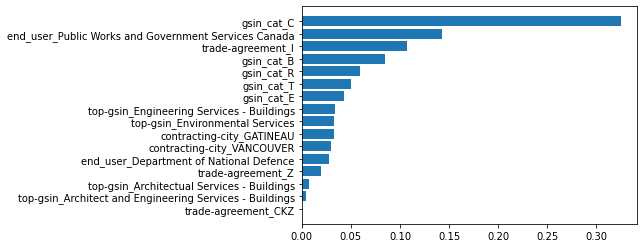

In [481]:
sorted_idx3 = rf.feature_importances_.argsort()
plt.barh(xTrainEvalB.columns[sorted_idx3],rf.feature_importances_[sorted_idx3])

### Extra Trees Classifier Top 10 Features

In [482]:
rfFit3 = rf.fit(xTrainEvalD, yTrainEvalD)
rfPred3 = rfFit3.predict(xTestEvalD)
rfScore3 = rfFit3.score(xTestEvalD, yTestEvalD)
print(rfScore3)

C:\Users\alana\AppData\Local\Temp/ipykernel_7848/3927002682.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfFit3 = rf.fit(xTrainEvalD, yTrainEvalD)


0.7777427241896049


In [483]:
rfConfMatrix3 = metrics.confusion_matrix(yTestEvalD, rfPred3)
print(rfConfMatrix3)

[[9762 2790]
 [  28   99]]


In [484]:
print(classification_report(yTestEvalD, rfPred3))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     12552
           1       0.03      0.78      0.07       127

    accuracy                           0.78     12679
   macro avg       0.52      0.78      0.47     12679
weighted avg       0.99      0.78      0.87     12679



In [485]:
print(roc_auc_score(yTestEvalD, rfPred3))

0.7786261122235436
